In [0]:
library (tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [0]:
zillow_url1 <- paste0("http://files.zillowstatic.com/research/public/City/",
                    "City_MedianRentalPricePerSqft_AllHomes.csv")
zillow_url2 <- paste0("http://files.zillowstatic.com/research/public/City/",
                      "City_ZriPerSqft_AllHomes.csv")
price_per_sqft <- read_csv(zillow_url1) 

Parsed with column specification:
cols(
  .default = col_double(),
  RegionName = col_character(),
  State = col_character(),
  Metro = col_character(),
  CountyName = col_character()
)

See spec(...) for full column specifications.



In [0]:
value_per_sqft <- read_csv(zillow_url2) 

Parsed with column specification:
cols(
  .default = col_double(),
  RegionName = col_character(),
  State = col_character(),
  Metro = col_character(),
  CountyName = col_character()
)

See spec(...) for full column specifications.



In [0]:
# First, we tidy the datasets:
price_per_sqft <- price_per_sqft %>%
    select(-Metro) %>%
    gather(`2010-01`:`2018-08`, key = "date", value = "price") 
value_per_sqft <- value_per_sqft %>%
    select(RegionID:CountyName, `2011-01`:`2018-08`) %>%
    gather(`2011-01`:`2018-08`, key = "date", value = "value") 
# Do the inner join:
home_per_sqft <- price_per_sqft %>%
    inner_join(value_per_sqft)

Joining, by = c("RegionName", "State", "CountyName", "date")



In [0]:
# Format dates:
home_per_sqft <- home_per_sqft %>%
    mutate(date = paste0(date, "-01"),
           date = as.Date(date))
# We filter to only top 10 priciest states this year
# excluding DC and HI:
top10_States <- home_per_sqft %>%
    filter(date >= as.Date("2018-01-01")) %>%
    filter(State != "HI", State != "DC") %>%
    group_by(State) %>%
    summarise(price = mean(price, na.rm = TRUE)) %>%
    top_n(10)

Selecting by price



In [0]:
home_per_sqft <- home_per_sqft %>%
    filter(State %in% top10_States$State)
#rm(price_per_sqft, value_per_sqft)

1.   For year 2018 and 2019, using the filtered `home_per_sqft` dataset show the relationship between the value and the price per square foot of homes in 10 chosen states. The value is a dollar-denominated and estimated by Zillow.

 *   Is there a correlation between the price and the value per square foot?
 *   Are there any atypical trends you observe?

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 141 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 141 rows containing missing values (geom_point).”


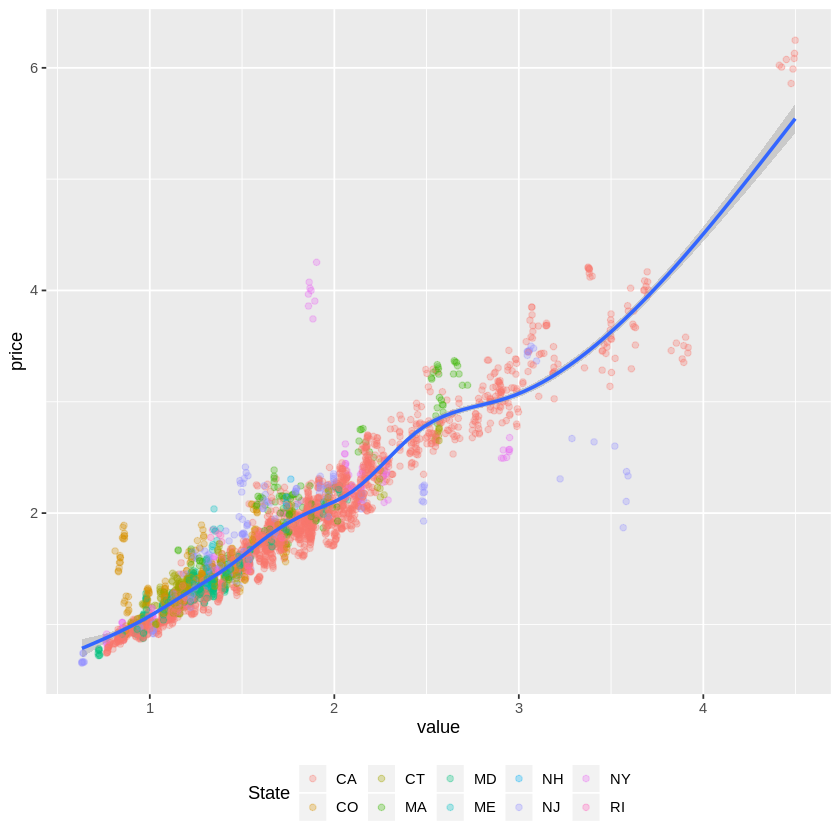

In [0]:
home_per_sqft %>%
    filter(date >= as.Date("2018-01-01")) %>%
    ggplot(aes(x = value, y = price)) +
    geom_point(aes(color = State), alpha = 0.3) +
    theme(legend.position = "bottom") +
    geom_smooth()

  Are there any clusters of regions that are pricier than, expected based on their estimated value? Find, the `RegionName` for an example these outliers, and see if it makes sense.

In [0]:
home_per_sqft %>% 
    filter(date >= as.Date("2018-01-01")) %>%
    filter(price > 5, value > 4)

RegionName,State,CountyName,SizeRank,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,⋯,2019-08,2019-09,2019-10,2019-11,2019-12,date,price,RegionID,Metro,value
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<chr>,<dbl>
Malibu,CA,Los Angeles County,1465,6.138735,5.873494,6.682061,6.844025,6.714414,6.792878,⋯,6.501726,6.348511,6.112467,5.895205,5.91133,2018-01-01,5.989075,12520,Los Angeles-Long Beach-Anaheim,4.486
Malibu,CA,Los Angeles County,1465,6.138735,5.873494,6.682061,6.844025,6.714414,6.792878,⋯,6.501726,6.348511,6.112467,5.895205,5.91133,2018-02-01,6.129597,12520,Los Angeles-Long Beach-Anaheim,4.494
Malibu,CA,Los Angeles County,1465,6.138735,5.873494,6.682061,6.844025,6.714414,6.792878,⋯,6.501726,6.348511,6.112467,5.895205,5.91133,2018-03-01,6.247397,12520,Los Angeles-Long Beach-Anaheim,4.498
Malibu,CA,Los Angeles County,1465,6.138735,5.873494,6.682061,6.844025,6.714414,6.792878,⋯,6.501726,6.348511,6.112467,5.895205,5.91133,2018-04-01,6.083978,12520,Los Angeles-Long Beach-Anaheim,4.492
Malibu,CA,Los Angeles County,1465,6.138735,5.873494,6.682061,6.844025,6.714414,6.792878,⋯,6.501726,6.348511,6.112467,5.895205,5.91133,2018-05-01,5.859375,12520,Los Angeles-Long Beach-Anaheim,4.476
Malibu,CA,Los Angeles County,1465,6.138735,5.873494,6.682061,6.844025,6.714414,6.792878,⋯,6.501726,6.348511,6.112467,5.895205,5.91133,2018-06-01,6.074766,12520,Los Angeles-Long Beach-Anaheim,4.450
Malibu,CA,Los Angeles County,1465,6.138735,5.873494,6.682061,6.844025,6.714414,6.792878,⋯,6.501726,6.348511,6.112467,5.895205,5.91133,2018-07-01,6.006765,12520,Los Angeles-Long Beach-Anaheim,4.424
Malibu,CA,Los Angeles County,1465,6.138735,5.873494,6.682061,6.844025,6.714414,6.792878,⋯,6.501726,6.348511,6.112467,5.895205,5.91133,2018-08-01,6.023253,12520,Los Angeles-Long Beach-Anaheim,4.412


Are there any clusters of regions that have higher value than, expected based on how cheap they are? Find, the RegionName for an example of these outliers, and see if it makes sense.

In [0]:
home_per_sqft %>% 
    filter(date >= as.Date("2018-01-01")) %>%
    filter(price > 3, value < 2)

RegionName,State,CountyName,SizeRank,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,⋯,2019-08,2019-09,2019-10,2019-11,2019-12,date,price,RegionID,Metro,value
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<chr>,<dbl>
New York,NY,Queens County,1,3.809524,3.747917,3.714286,3.666667,3.619691,3.75,⋯,3.953488,3.931801,3.908907,3.906058,3.988734,2018-01-01,4.252874,6181,New York-Newark-Jersey City,1.904
New York,NY,Queens County,1,3.809524,3.747917,3.714286,3.666667,3.619691,3.75,⋯,3.953488,3.931801,3.908907,3.906058,3.988734,2018-02-01,3.904651,6181,New York-Newark-Jersey City,1.894
New York,NY,Queens County,1,3.809524,3.747917,3.714286,3.666667,3.619691,3.75,⋯,3.953488,3.931801,3.908907,3.906058,3.988734,2018-03-01,3.744375,6181,New York-Newark-Jersey City,1.884
New York,NY,Queens County,1,3.809524,3.747917,3.714286,3.666667,3.619691,3.75,⋯,3.953488,3.931801,3.908907,3.906058,3.988734,2018-04-01,4.000000,6181,New York-Newark-Jersey City,1.874
New York,NY,Queens County,1,3.809524,3.747917,3.714286,3.666667,3.619691,3.75,⋯,3.953488,3.931801,3.908907,3.906058,3.988734,2018-05-01,4.019692,6181,New York-Newark-Jersey City,1.868
New York,NY,Queens County,1,3.809524,3.747917,3.714286,3.666667,3.619691,3.75,⋯,3.953488,3.931801,3.908907,3.906058,3.988734,2018-06-01,4.074344,6181,New York-Newark-Jersey City,1.864
New York,NY,Queens County,1,3.809524,3.747917,3.714286,3.666667,3.619691,3.75,⋯,3.953488,3.931801,3.908907,3.906058,3.988734,2018-07-01,3.966597,6181,New York-Newark-Jersey City,1.860
New York,NY,Queens County,1,3.809524,3.747917,3.714286,3.666667,3.619691,3.75,⋯,3.953488,3.931801,3.908907,3.906058,3.988734,2018-08-01,3.860000,6181,New York-Newark-Jersey City,1.860


2.   Collapse the data by computing the average of the  home price per square foot for each (state, date) pair. Then show the price trend over time for each of the top 10 states.

Warning message:
“Removed 174 rows containing missing values (geom_path).”


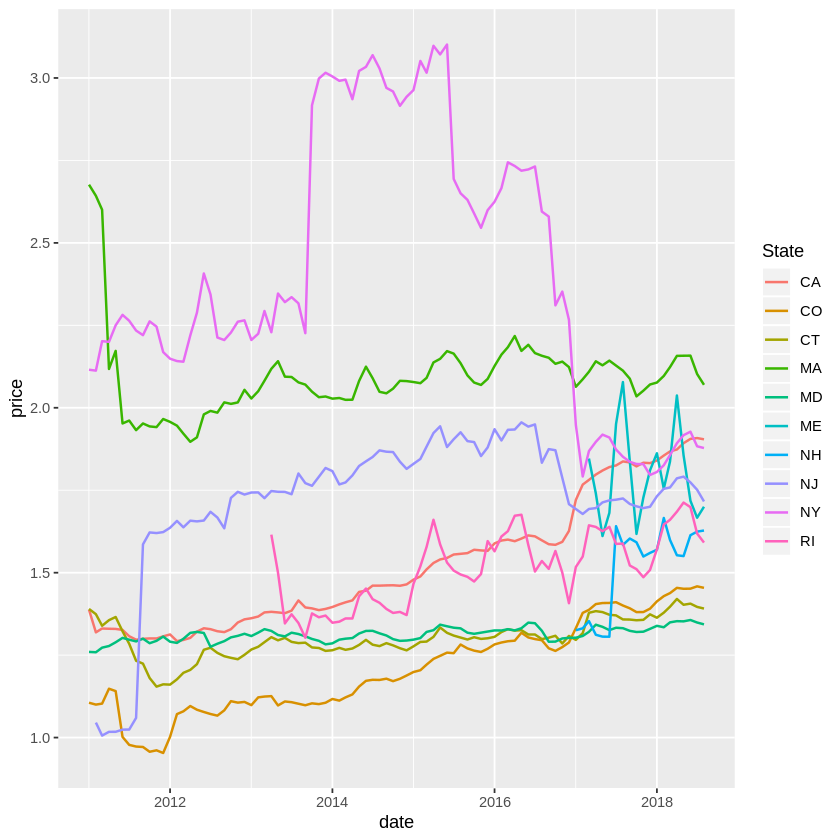

In [0]:
df <- home_per_sqft %>%
    group_by(State, date) %>%
    summarise(
        price = mean(price, na.rm = TRUE),
        #value = mean(value, na.rm = TRUE)) 
ggplot(data = df, aes(x = date, y = price, color = State)) +
    geom_line(lwd = 0.7)

3.   Now, subset your home_per_sqft dataset to homes located in the Bay Area:

In [0]:
bayarea_counties <- c("Alameda County", "Napa County", "Santa Clara County", "Contra Costa County", 
                      "San Francisco County", "Solano County", "Marin County", "San Mateo County", 
                      "Sonoma County")
                      
bay_area_home <- home_per_sqft %>%
    filter(CountyName %in%  bayarea_counties)

Filter your observations to the once after “2013-09-01”. Then generate a boxplot of home prices per square foot for the following regions:

In [0]:
cities <- c("Oakland", "San Francisco", "Berkeley", "San Jose",
            "San Mateo", "Redwood City", "Mountain View", "Napa",
            "South San Francisco", "Menlo Park", "Cupertino")

For which region were the median home prices per square foot highest over the most recent 5 years period?

Warning message:
“Removed 147 rows containing non-finite values (stat_boxplot).”


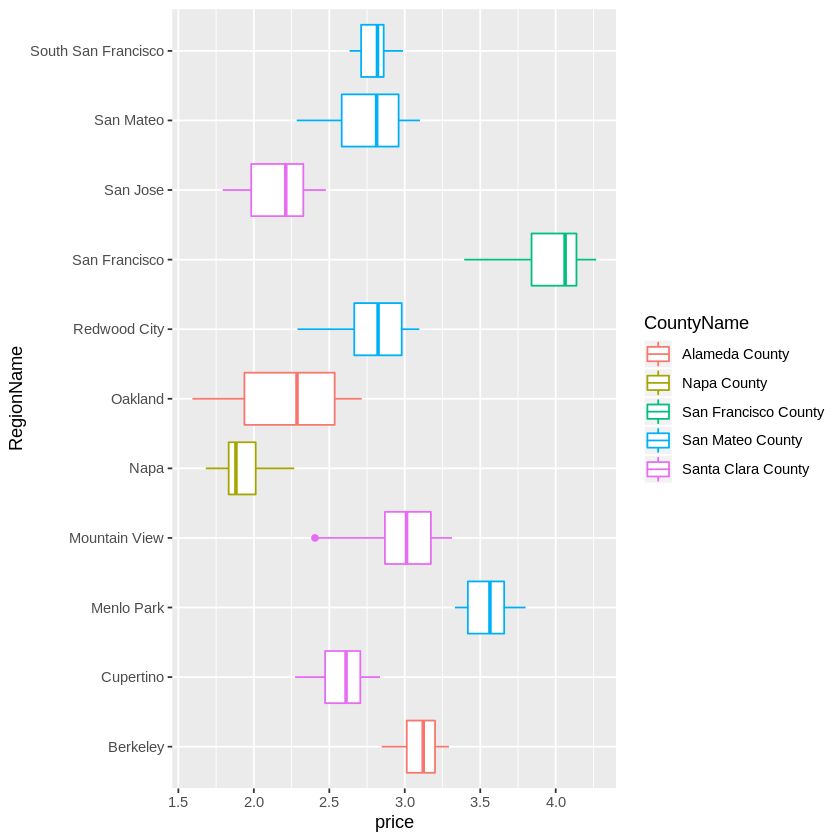

In [0]:
df <- bay_area_home %>%
    filter(date >= as.Date("2013-09-01")) %>%
    filter(RegionName %in% cities) 
ggplot(df, aes(x = RegionName, y = price)) +
    geom_boxplot(aes(color = CountyName)) +
    coord_flip()